In [ ]:
# pip install scikit-learn 
# pip install pandas
# pip install matplotlib

In [61]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the flight data from the database
link_flights = "files/limpios2023.csv"
flight_data = pd.read_csv(link_flights) 

In [ ]:
flight_data

In [ ]:
# Preprocess the data
flight_data['STD'] = pd.to_datetime(flight_data['STD'])  # Convert flight_date to datetime
flight_data['STA'] = pd.to_datetime(flight_data['STA'])  # Convert booking_date to datetime

In [ ]:
flight_data

In [43]:
# Split the data into training and testing sets

bookings = flight_data['Bookings']  # Input feature
passengers = flight_data['Passengers']  # Target variable

In [63]:

# Split the data into training and testing sets

bookings_train, bookings_test, passengers_train, passengers_test = train_test_split(bookings, passengers, test_size=0.2, random_state=42)

# Train the linear regression model
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(bookings_train.values.reshape(-1, 1), passengers_train)

# Make predictions on the test set
predicted_passengers = modelo_sklearn.predict(bookings_test.values.reshape(-1, 1))

# Calculate R-squared (coefficient of determination)
r2 = r2_score(passengers_test, predicted_passengers)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(passengers_test, predicted_passengers)

# Calculate Mean Squared Residual (MSR) or Mean Squared Aperture (MSA)
# Assuming no specific model for calculating MSA is provided:
# We can estimate MSA as the variance of the residuals (errors)
residuals = passengers_test - predicted_passengers
msa = residuals.var()

# Print the results
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Squared Aperture (MSA):", msa)



R-squared: 0.5369852133975054
Mean Squared Error (MSE): 651.7353792058932
Mean Squared Aperture (MSA): 651.7428674181181


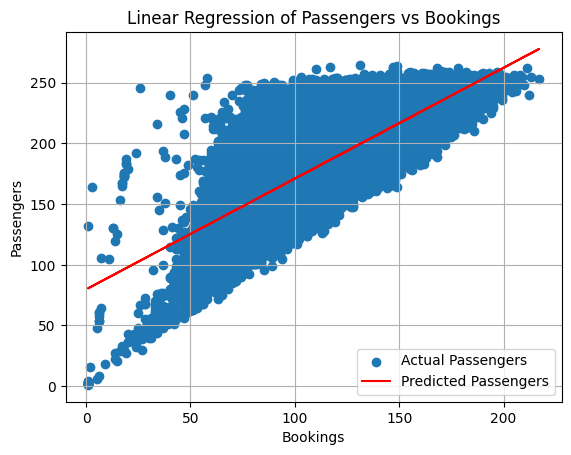

In [64]:
#Create a scatter plot for visualization

plt.scatter(bookings_test, passengers_test, label='Actual Passengers')
plt.plot(bookings_test, predicted_passengers, color='red', label='Predicted Passengers')
plt.xlabel('Bookings')
plt.ylabel('Passengers')
plt.title('Linear Regression of Passengers vs Bookings')
plt.legend()
plt.grid(True)
plt.show()